# CameraView and Rendering [todo]

* setting camera to frame
* grabbing img & depth
* converting to point clouds (and displaying)
* generating videos by saving pngs + ffmpeg
* realistic rendering using nvisii

In [2]:
from robotic import ry
print(ry.__version__, ry.compiled())

0.0.22 compile time: Oct 10 2023 21:52:17


In [3]:
C = ry.Config()
C.addFile(ry.raiPath('scenarios/pandaSingle.g'))
C.view()

0

In [4]:
rgb = C.view_getScreenshot()

In [8]:
rgb.shape

(400, 400, 3)

In [5]:
from IPython.display import Image, display

In [14]:
from PIL import Image, ImageOps

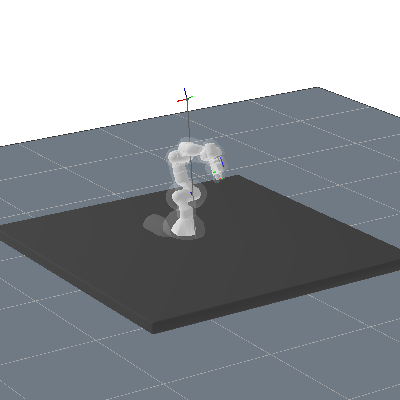

In [15]:
    img = ImageOps.flip(Image.fromarray(rgb, 'RGB'))
    display(img)

## Rendering configurations

Camera images and depth are usually accessed via a simulation interface (BotOp). But we can compute images and depth also directly for a given configuration, without really creating a (physical) simulation. Here the basic approach: We can also add a frame, attached to the head, which has no shape associated to it, but create a view is associated with that frame
TODO: Add nvisii support/export!

In [ ]:
C.addFrame(name='camera', parent='head_tilt_link', args='Q:<d(-90 1 0 0) d(180 0 0 1)> focalLength:.3')
V = C.cameraView()

In [ ]:
Vimg = V.imageViewer()
Vseg = V.segmentationViewer()
Vpcl = V.pointCloudViewer()

In [ ]:
V.addSensor('kinect', 'endeffKinect', 640, 480, 580./480., -1., [.1, 50.] )
#V.addSensor(name='camera', frameAttached='camera', width=600, height=400)
V.selectSensor('kinect')
[image,depth] = V.computeImageAndDepth()
seg = V.computeSegmentation()
pcl = V.computePointCloud(depth)
print('image shape:', image.shape)
print('depth shape:', depth.shape)
print('segmentation shape:', seg.shape)
print('pcl shape:', pcl.shape)

When we move the robot, that view moves with it:

In [ ]:
C.setJointState([0.5], ['head_pan_joint'])
C.setJointState([1.], ['head_tilt_joint'])
V.updateConfig(C)
[image,depth] = V.computeImageAndDepth()
pcl = V.computePointCloud(depth)

To close a view (or destroy a handle to a computational module), we reassign it to zero. We can also remove a frame from the configuration.

In [ ]:
Vimg = 0
Vseg = 0
Vpcl = 0
V = 0
C.delFrame('camera')

In [ ]:
C.view_close()